<a href="https://colab.research.google.com/github/ivobug/Face-Recognition/blob/main/Face_Recoognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [3]:
POS_PATH=os.path.join('data','positive')
NEG_PATH=os.path.join('data','negative')
ANC_PATH=os.path.join('data','anchor')

In [4]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)


In [5]:
! pip install -q kaggle

! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

In [6]:
!kaggle datasets download -d jessicali9530/lfw-dataset

 93% 105M/112M [00:01<00:00, 116MB/s] 
100% 112M/112M [00:01<00:00, 109MB/s]


In [7]:
!unzip /content/lfw-dataset.zip

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0022.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0023.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0024.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0025.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0026.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0027.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0028.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0029.jpg  
  inflating: lfw-deepfunneled/lfw-deepfunneled/Luiz_Ina

In [8]:
RAW=os.path.join('lfw-deepfunneled','lfw-deepfunneled')
for directory in os.listdir(RAW):
  for file in os.listdir(os.path.join(RAW, directory)):
    EX_PATH=os.path.join(RAW,directory,file)
    NEW_PATH=os.path.join(NEG_PATH,file)
    os.replace(EX_PATH,NEW_PATH)

In [9]:
pip install gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import gdown


! gdown 1Ul5NeiF6dyXa_7U0ZM5rN00IVPtjLGv3


Downloading...
From: https://drive.google.com/uc?id=1Ul5NeiF6dyXa_7U0ZM5rN00IVPtjLGv3
To: /content/createData.zip
100% 3.84M/3.84M [00:00<00:00, 208MB/s]


In [11]:
!unzip /content/createData.zip


Archive:  /content/createData.zip
   creating: createData/data/
   creating: createData/data/anchor/
   creating: createData/data/positive/
  inflating: createData/data/anchor/c6cb75cb-c355-11ed-bedd-90e868108104.jpg  
  inflating: createData/data/anchor/c6d71d45-c355-11ed-a849-90e868108104.jpg  
  inflating: createData/data/anchor/c6dbff7b-c355-11ed-91f5-90e868108104.jpg  
  inflating: createData/data/anchor/c6e0ba40-c355-11ed-a826-90e868108104.jpg  
  inflating: createData/data/anchor/c6e59c44-c355-11ed-9d1b-90e868108104.jpg  
  inflating: createData/data/anchor/c6ea7e56-c355-11ed-a191-90e868108104.jpg  
  inflating: createData/data/anchor/c6ef603c-c355-11ed-b836-90e868108104.jpg  
  inflating: createData/data/anchor/c6f41b37-c355-11ed-82c5-90e868108104.jpg  
  inflating: createData/data/anchor/c6f8d625-c355-11ed-8f2a-90e868108104.jpg  
  inflating: createData/data/anchor/c6fdb81f-c355-11ed-a189-90e868108104.jpg  
  inflating: createData/data/anchor/c7029a22-c355-11ed-9ae4-90e8681081

In [12]:
RAW=os.path.join('createData','data')
for directory in os.listdir(RAW):
  for file in os.listdir(os.path.join(RAW, directory)):
    EX_PATH=os.path.join(RAW,directory,file)
    NEW_PATH=os.path.join('data',directory,file)
    os.replace(EX_PATH,NEW_PATH)

In [13]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [14]:
dir_test=anchor.as_numpy_iterator()

In [15]:
dir_test.next()

b'data/anchor/c95655a0-c355-11ed-80dd-90e868108104.jpg'

In [16]:
def preprocess(file_path):
  byte_img=tf.io.read_file(file_path)
  img=tf.io.decode_jpeg(byte_img)
  img=tf.image.resize(img,(100,100))
  img=img/255.0
  return img

In [17]:
img=preprocess('data/anchor/c84ee5ba-c355-11ed-89fb-90e868108104.jpg')

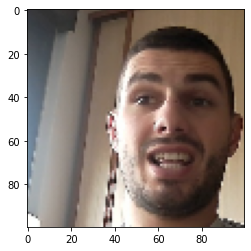

In [18]:
plt.imshow(img)

In [19]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [20]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [21]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [22]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [23]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [24]:
def make_embedding():
  inp=Input(shape=(100,100,3),name='input_image')
  c1=Conv2D(64,(10,10),activation='relu')(inp)
  m1=MaxPooling2D(64,(2,2),padding='same')(c1)

  c2=Conv2D(128,(7,7),activation='relu')(m1)
  m2=MaxPooling2D(64,(2,2),padding='same')(c2)

  c3=Conv2D(128,(4,4),activation='relu')(m2)
  m3=MaxPooling2D(64,(2,2),padding='same')(c3)

  c4 = Conv2D(256, (4,4), activation='relu')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096, activation='sigmoid')(f1)

  return Model(inputs=[inp], outputs=[d1], name='embedding')

In [25]:
embedding = make_embedding()


In [26]:
class L1Dist(Layer):
    
    def __init__(self, **kwargs):
        super().__init__()
       
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [28]:
l1 = L1Dist()
#l1(anchor_embedding, validation_embedding)


In [29]:
siamese_layer = L1Dist()


In [30]:
def make_siamese_model(): 
    
    input_image = Input(name='input_img', shape=(100,100,3))
    
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [31]:
siamese_model = make_siamese_model()
siamese_model.summary()


Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

In [33]:
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001


In [34]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [35]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [36]:
from tensorflow.keras.metrics import Precision, Recall
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [38]:
EPOCHS = 50
train(train_data, EPOCHS)



 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
8/8 [==============================] - 15s 415ms/step
0.3484601 0.0 0.0

 Epoch 2/50
8/8 [==============================] - 2s 263ms/step
0.04155523 0.0 0.0

 Epoch 3/50
8/8 [==============================] - 2s 291ms/step
0.15241796 0.2 1.0

 Epoch 4/50
8/8 [==============================] - 2s 259ms/step
0.0010992301 0.4 1.0

 Epoch 5/50
8/8 [==============================] - 2s 288ms/step
0.14062326 0.4117647 1.0

 Epoch 6/50
8/8 [==============================] - 3s 316ms/step
0.25494343 0.36363637 1.0

 Epoch 7/50
8/8 [==============================] - 2s 304ms/step
0.20743056 0.78571427 1.0

 Epoch 8/50
8/8 [==============================] - 2s 277ms/step
0.12531959 0.6875 1.0

 Epoch 9/50
8/8 [==============================] - 3s 341ms/step
1.5825264e-05 0.90909094 1.0

 Epoch 10/50
8/8 [===========================

In [39]:
from tensorflow.keras.metrics import Precision, Recall


In [41]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()
y_hat = siamese_model.predict([test_input, test_val])
[1 if prediction > 0.5 else 0 for prediction in y_hat ]


1/1 [==============================] - 0s 39ms/step


[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [42]:
y_true


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

In [44]:
m = Recall()

m.update_state(y_true, y_hat)
m.result().numpy()

1.0

In [46]:
m = Precision()

m.update_state(y_true, y_hat)

m.result().numpy()

1.0

In [47]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 0s 322ms/step
1.0 1.0


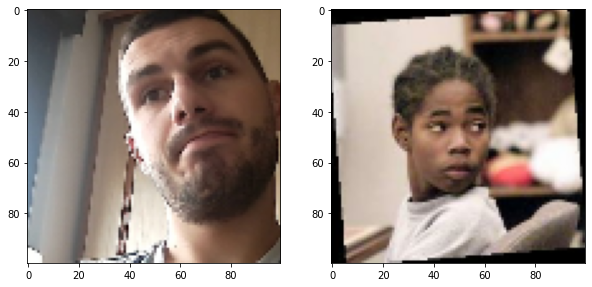

In [50]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(test_input[0])

plt.subplot(1,2,2)
plt.imshow(test_val[0])

plt.show()